<a href="https://colab.research.google.com/github/sankalp142002/Brest-cancer-KNN/blob/main/Brest_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

%matplotlib inline

# import modules
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

# Collections
from collections import Counter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load data
breast_cancer=datasets.load_breast_cancer()
print(breast_cancer.DESCR)

# this dataset has 30 features
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names )


# extract the data as numpy arrays of features, X, and target, y
X = df_breast_cancer
y = breast_cancer.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:


X=breast_cancer.data
Y=breast_cancer.target
feature_names = np.array(breast_cancer.feature_names)
target_names = breast_cancer.target_names

def myplotgrid(x,y,col):
    df = pd.DataFrame(x, columns=col)
    df['label'] = y
    sns.pairplot(df, hue='label')
    plt.show()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


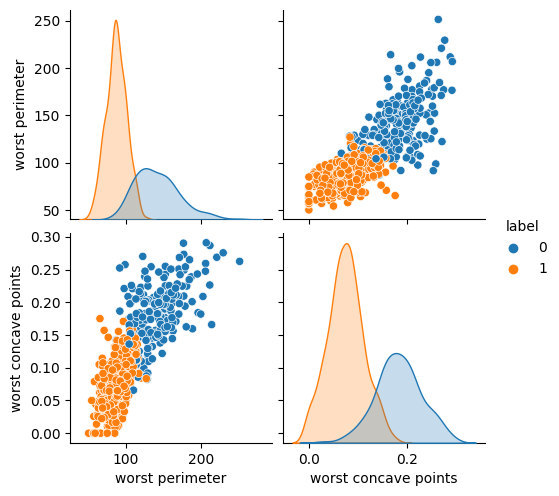

In [16]:


print(feature_names)

a = 22
b = 27

myplotgrid(X[:, [a,b]], Y, col=feature_names[[a,b]])

In [17]:

def euclidean_distance(row1,row2) -> float:
    distance = 0.0

    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2

    return round(math.sqrt(distance), 4)




def manhattan(row1,row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += abs(row1[i] - row2[i])
    return distance




def chebyshev_distance(array1, array2) -> float:

    distance = 0.0

    for i in range(len(array1)):

        dist = abs(array1[i] - array2[i])

        if dist > distance:
            distance = dist

    return float(distance)



function_mappings = {'euclidean': euclidean_distance, 'manhattan' : manhattan, 'chebyshev' : chebyshev_distance}




def mykNN(X,y,X_, num_neighbors,distance=euclidean_distance):
    distances = list()
    train = np.append(X,y.reshape(-1,1),axis=1)
    test_row = X_
    for train_row in train:
        dist = distance(test_row,train_row)
        distances.append((train_row, dist))




    distances.sort(key=lambda tup: tup[1])

    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [18]:


predict = mykNN(X,y,X[100],3,manhattan)
predict = mykNN(X,y,X[100],3)
predict = mykNN(X,y,X[100],3,chebyshev_distance)


In [19]:
np.random.seed(myseed)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')


knn.fit(X_train,y_train)



y_pred=knn.predict(X_test)


myknn_pred = list()
for i in range(len(X_test)):
    myknn_pred.append(int(mykNN(X_train,y_train,X_test[i], 10)))


print("True Values", y_test)

print("\nSklearn's KNN Classifier: ", y_pred)
print("\nOur KNN Classifier: ", myknn_pred)
print(len(y_pred) == len(myknn_pred))
print(len(y_pred))

True Values [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 0]

Sklearn's KNN Classifier:  [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1]

Our KNN Classifier:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
True
114


In [20]:
from sklearn.metrics import accuracy_score as acc
print("Accuracy of Sklearn KNN Classifier: ", acc(y_test, y_pred))
print("Accuracy of Our KNN Classifier: ", acc(y_test, myknn_pred))

Accuracy of Sklearn KNN Classifier:  0.9298245614035088
Accuracy of Our KNN Classifier:  0.9298245614035088
